In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
# df = pd.read_excel("../../")
print("heelo")

heelo


[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70.]


C:\Users\marek\AppData\Local\Temp\ipykernel_23920\2487214938.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df.to_latex(


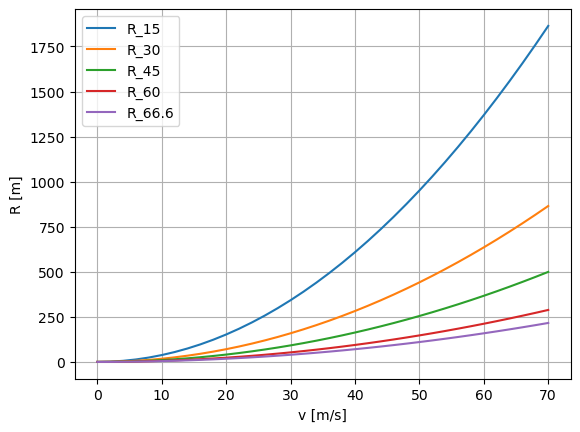

In [90]:
def R(v, phi):
    return v**2/(9.81*np.tan(np.deg2rad(phi)))

phi_list = [15, 30, 45, 60, 66.6]
v = np.linspace(0, 70, 36)

print(v)

df = pd.DataFrame(columns=[f"R_{i}" for i in phi_list], index=v)

for phi in phi_list:
    df[f"R_{phi}"] = R(v, phi)

# save the data to latex table
with open("../latex_raport/R_table.tex", "w") as f:
    f.write(df.to_latex(
        index=False,
        float_format="%.2f",
    )) 
    

df.plot()
plt.grid()
plt.xlabel("v [m/s]")
plt.ylabel("R [m]")
plt.savefig("../latex_raport/img/R_plot.png", dpi = 200)

C:\Users\marek\AppData\Local\Temp\ipykernel_23920\796008201.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return 2*m*9.81/(rho*S*v**2*np.cos(np.deg2rad(phi)))
C:\Users\marek\AppData\Local\Temp\ipykernel_23920\796008201.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_cz.to_latex(


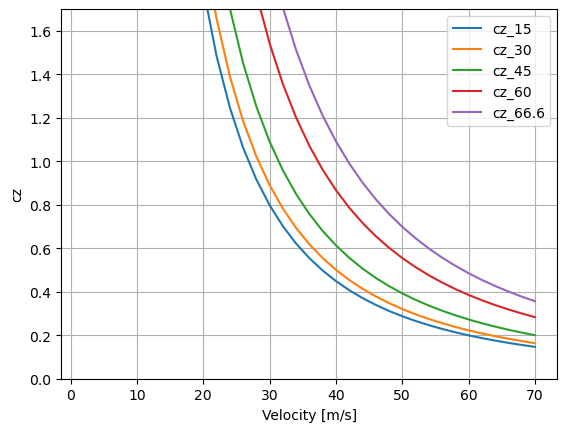

In [91]:
def cz(m, v, phi):
    S = 15
    rho = 1.225
    return 2*m*9.81/(rho*S*v**2*np.cos(np.deg2rad(phi)))

df_cz = pd.DataFrame(columns=[f"cz_{i}" for i in phi_list], index=v)

for phi in phi_list:
    df_cz[f"cz_{phi}"] = cz(650, v, phi)
    


with open("../latex_raport/cz_table.tex", "w") as f:
    f.write(df_cz.to_latex(
        index=False,
        float_format="%.2f",
    ))
    
df_cz.plot()
# set limit on plot
plt.ylim(0, 1.7)
plt.grid()
plt.xlabel("Velocity [m/s]")
plt.ylabel("cz")

plt.savefig("../latex_raport/img/cz_plot.png", dpi = 200)

In [92]:
df_cx = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="proj2_copy",usecols="L:Z", skiprows=1)
df_cx = df_cx[df_cx['alpha']>-14]
df_cx = df_cx[df_cx['alpha']<14]

cx_poly = np.polyfit(df_cx["cz"], df_cx["C_x samolot"], 7)
cx_p = np.poly1d(cx_poly)

In [93]:
def n_zakr(N, phi):
    return N/np.cos(np.deg2rad(phi))

C:\Users\marek\AppData\Local\Temp\ipykernel_23920\796008201.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return 2*m*9.81/(rho*S*v**2*np.cos(np.deg2rad(phi)))
c:\Users\marek\anaconda3\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
C:\Users\marek\AppData\Local\Temp\ipykernel_23920\172589161.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_p.to_latex(


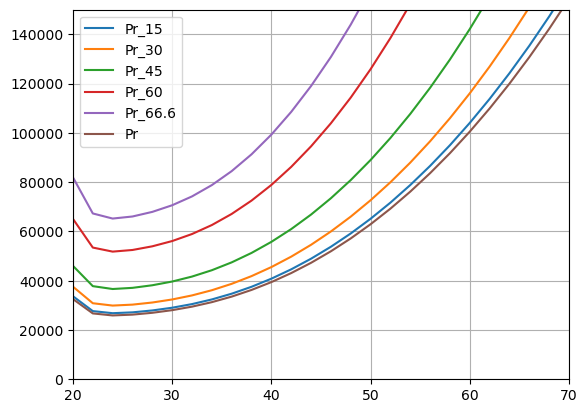

In [95]:
df_p = pd.DataFrame(columns=[f"Pr_{i}" for i in phi_list], index=v)
cz_l = cz(650, v, 0)
cx_l = cx_p(cz_l)

rho = 1.225
S = 15

df_p["Pr"] = 1/2 * rho*S*v**3*cx_l

for phi in phi_list:
    df_p[f"Pr_{phi}"] = n_zakr(df_p["Pr"], phi)

df_p.plot()
plt.ylim(0, 150000)
plt.xlim(20, 70)
plt.grid()
plt.savefig("../latex_raport/img/Pr_plot.png", dpi = 200)

with open("../latex_raport/Pr_table.tex", "w") as f:
    f.write(df_p.to_latex(
        index=False,
        float_format="%3.2f",
    ))